# Using COCO

First, we will import fiftyone lib and dowload the datasets.

## ALERT

COCO is a very large dataset. Be sure that you have space in your disks to download it.

In [28]:
# from https://medium.com/voxel51/the-coco-dataset-best-practices-for-downloading-visualization-and-evaluation-68a3d7e97fb7
import fiftyone as fo
import fiftyone.zoo as foz

# Download person, cat and dog Validation dataset

# val2017 = foz.load_zoo_dataset(
#     "coco-2017",
#     split="validation",
#     label_types=["detections"],
#     classes=["person", "cat", "dog"],    
# )

# session = fo.launch_app(val2017)

train = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["person", "cat", "dog"],
    max_samples=100 # remove limitations if project is working
)

test = foz.load_zoo_dataset(
    "coco-2017",
    split="test",
    label_types=["detections"],
    classes=["person", "cat", "dog"],
    max_samples=100 # remove limitations if project is working
)

validation = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=["person", "cat", "dog"],
    max_samples=100 # remove limitations if project is working
)


Found annotations at '/home/sergio/fiftyone/coco-2017/raw/instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'coco-2017-train-100'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Test split is unlabeled; ignoring classes requirement
Found test info at '/home/sergio/fiftyone/coco-2017/raw/image_info_test2017.json'
Sufficient images already downloaded
Existing download of split 'test' is sufficient
Loading existing dataset 'coco-2017-test-100'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Found annotations at '/home/sergio/fiftyone/coco-2017/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-100'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` t


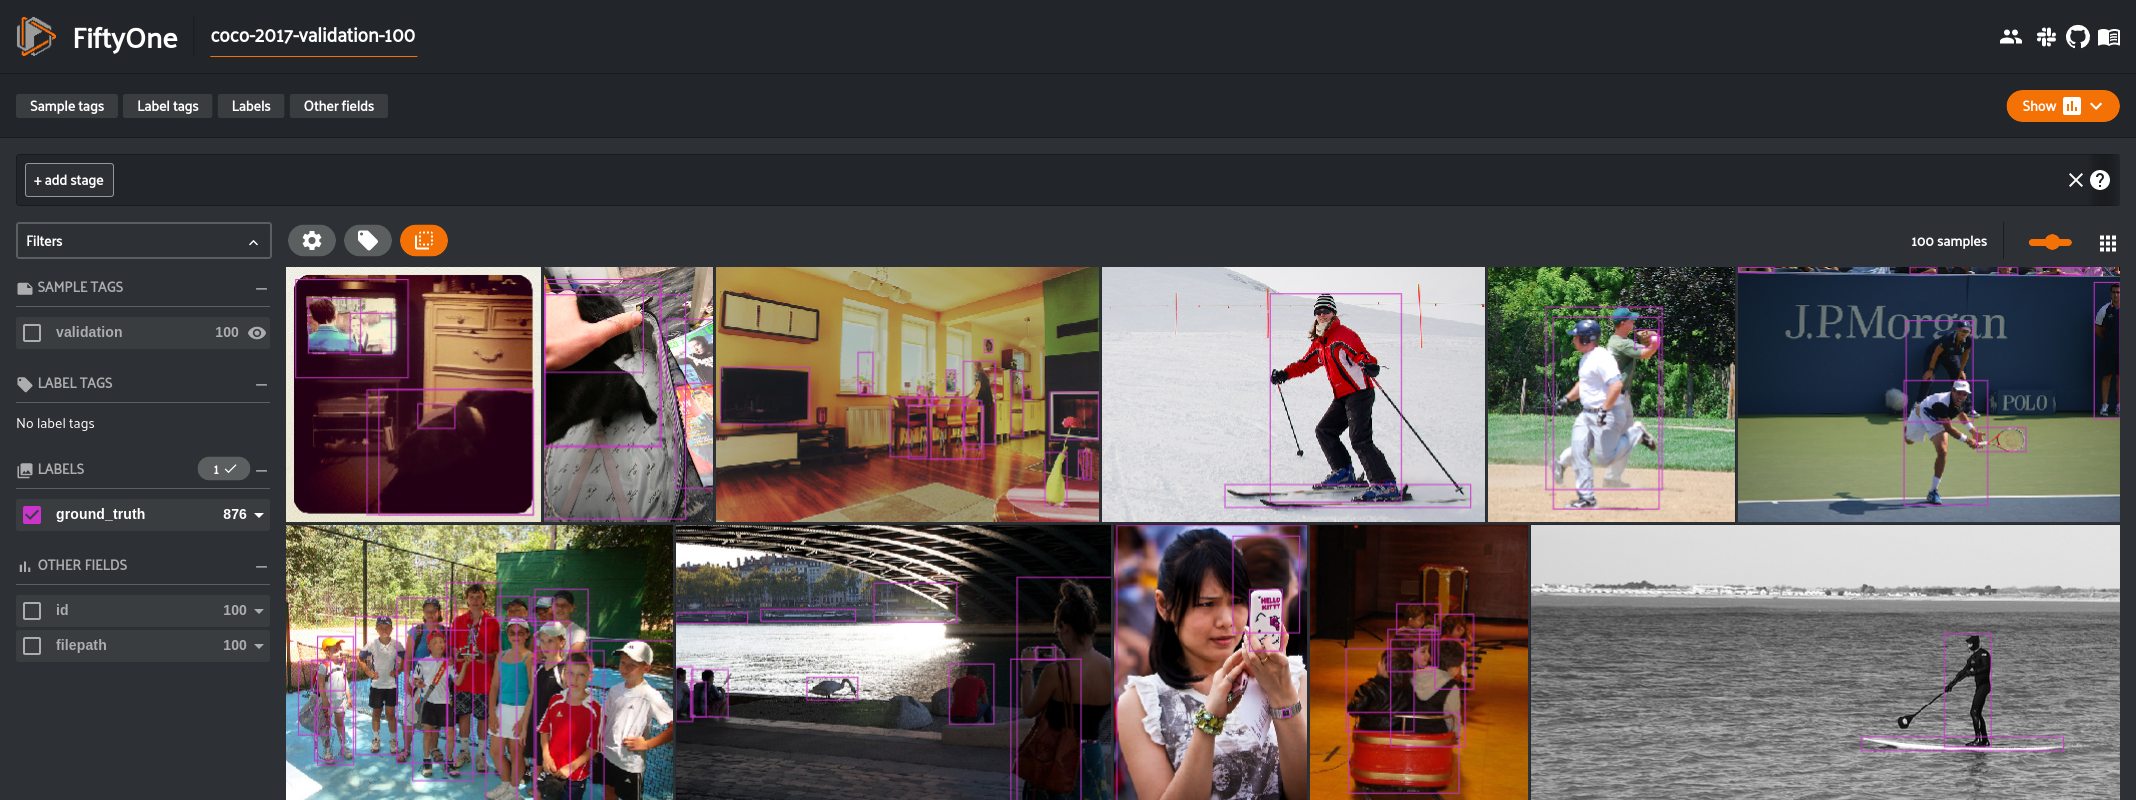

In [29]:
# Look at the data
session = fo.launch_app(validation)

In [40]:
# filterirg detections

for item in train:
    item.ground_truth.detections = [detection for detection in item.ground_truth.detections if detection.label in ['cat', 'dog', 'person']]
    # print(item.filename, [detection.label for detection in item.ground_truth.detections])

for item in train:
    # item.ground_truth.detections = [detection for detection in item.ground_truth.detections if detection.label in ['cat', 'dog', 'person']]
    print(item.filename, [detection.label for detection in item.ground_truth.detections])


for item in validation:
    item.ground_truth.detections = [detection for detection in item.ground_truth.detections if detection.label in ['cat', 'dog', 'person']]

<Sample: {
    'id': '62294a31084477e70eccb30e',
    'media_type': 'image',
    'filepath': '/home/sergio/fiftyone/coco-2017/train/data/000000001319.jpg',
    'tags': BaseList(['train']),
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 518,
        'height': 600,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': BaseList([
            <Detection: {
                'id': '62294a31084477e70eccb306',
                'attributes': BaseDict({}),
                'tags': BaseList([]),
                'label': 'dog',
                'bounding_box': BaseList([
                    0.6066795366795367,
                    0.23199999999999998,
                    0.1684169884169884,
                    0.2617333333333333,
                ]),
                'mask': None,
                'confidence': None,
                'index': None,
                'supercategory': 'animal',
                'i

In [41]:
session = fo.launch_app(train)

In [27]:
# Export datasets to YOLO format
train_dir = "../datasets/COCOPP/train"
test_dir = "../datasets/COCOPP/test"
validation_dir = "../datasets/COCOPP/validation"

train.export(
    export_dir= train_dir,
    dataset_type=fo.types.YOLOv5Dataset
)
test.export(
    export_dir= test_dir,
    dataset_type=fo.types.YOLOv5Dataset,
)
validation.export(
    export_dir= validation_dir,
    dataset_type=fo.types.YOLOv5Dataset
)

 100% |█████████████████| 100/100 [336.1ms elapsed, 0s remaining, 297.5 samples/s]      
 100% |█████████████████| 100/100 [59.3ms elapsed, 0s remaining, 1.7K samples/s] 
 100% |█████████████████| 100/100 [303.4ms elapsed, 0s remaining, 329.6 samples/s]      


In [3]:
# Remove classes that are not "cat", "dog" or "person"
import glob

def convert_classes(dir):
    for file in glob.glob(dir + "/labels/val/*.txt"):
        new_labels = ""
        with open(file) as f:
            for line in f:
                s = line.split(" ", 1)
                if s[0] == "1":  # person
                    new_labels += "0 " + s[1]
                elif s[0] == "17": # cat
                    new_labels += "1 " + s[1]
                elif s[0] == "18": # dog
                    new_labels += "2 " + s[1]
            f.close()
        
        fout = open(file, "w")
        fout.write(new_labels)
        fout.close()

convert_classes(validation_dir)
convert_classes(train_dir)

In [4]:
# Manage structure
import shutil
import os

shutil.move("../datasets/COCOPP/validation/images/val", "../datasets/COCOPP/images/valid")
shutil.move("../datasets/COCOPP/validation/labels/val", "../datasets/COCOPP/labels/valid")

shutil.move("../datasets/COCOPP/train/images/val", "../datasets/COCOPP/images/train")
shutil.move("../datasets/COCOPP/train/labels/val", "../datasets/COCOPP/labels/train")

'../datasets/COCOPP/labels/train'

In [5]:
# Remove old folders
shutil.rmtree("../datasets/COCOPP/validation")
shutil.rmtree("../datasets/COCOPP/train")